In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
np.random.seed(1337)  # for reproducibility


In [2]:
from keras.datasets import imdb
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Convolution1D, MaxPooling1D


Using TensorFlow backend.


In [3]:
# Embedding
max_features = 20000  #number of row
maxlen = 100          #dimension
embedding_size = 128

# Convolution
filter_length = 5
nb_filter = 64
pool_length = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
nb_epoch = 2

# batch_size is highly sensitive. Only 2 epochs are needed as the dataset is very small.


In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = max_features)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

/Users/Shawn/anaconda/lib/python3.6/site-packages/keras/datasets/imdb.py:44: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


25000 train sequences
25000 test sequences


In [7]:
# 補0，同樣長度

X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (25000, 100)
X_test shape: (25000, 100)
Y_train shape: (25000, 2)
Y_test shape: (25000, 2)


In [9]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length = maxlen))
model.add(Dropout(0.25))
model.add(Convolution1D(filters          = nb_filter,
                        filter_length    = filter_length,
                        border_mode      = 'valid',
                        activation       = 'relu',
                        subsample_length = 1))
model.add(MaxPooling1D(pool_length = pool_length))
model.add(LSTM(lstm_output_size))
model.add(Dense(Y_train.shape[1]))
model.add(Activation('sigmoid'))

model.compile(loss      = 'binary_crossentropy',
              optimizer = 'adam',
              metrics   = ['accuracy'])
model.summary()

/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=5, strides=1, padding="valid")`
/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=4)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 142       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total para

/Users/Shawn/anaconda/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 22500 samples, validate on 2500 samples
Epoch 1/2
106s - loss: 0.3907 - acc: 0.8177 - val_loss: 0.3456 - val_acc: 0.8412
Epoch 2/2
105s - loss: 0.1966 - acc: 0.9263 - val_loss: 0.3672 - val_acc: 0.8570


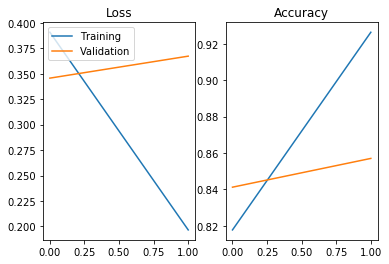

25000/25000 [==============================] - 20s     

In [10]:
history = model.fit(X_train, Y_train,
                    batch_size = batch_size,
                    nb_epoch = nb_epoch,
                    verbose = 2,
                    shuffle = True,
                    validation_split = 0.1)
                              
loss = history.history.get('loss')
acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss, label = 'Training')
plt.plot(range(len(val_loss)), val_loss, label = 'Validation')
plt.title('Loss')
plt.legend(loc = 'upper left')
plt.subplot(122)
plt.plot(range(len(acc)), acc, label = 'Training')
plt.plot(range(len(val_acc)), val_acc, label = 'Validation')
plt.title('Accuracy')
plt.show()


In [11]:
score, acc = model.evaluate(X_test, Y_test, batch_size = batch_size ,verbose=10)
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.390491617921
Test accuracy: 0.845699994087
